In [55]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import beta, uniform
import seaborn as sns

## Example 1

In [36]:
NUM_TRIALS = 2000
BANDIT_PROBABILITIES = [0.2, 0.5, 0.75]

In [30]:
class Bandit(object):
  def __init__(self, p):
    self.p = p
    self.a = 1
    self.b = 1

  def pull(self):
    return np.random.random() < self.p

  def sample(self):
    return np.random.beta(self.a, self.b)

  def update(self, x):
    self.a += x
    self.b += 1 - x


def plot(bandits, trial):
  x = np.linspace(0, 1, 200)
  for b in bandits:
    y = beta.pdf(x, b.a, b.b)
    plt.plot(x, y, label='real p: %.4f' % b.p)
  plt.title('Bandit distributions after %s trials' % trial)
  plt.legend()
  plt.show()

def experiment():
  bandits = [Bandit(p) for p in BANDIT_PROBABILITIES]

  sample_points = [5, 10, 20, 50, 100, 200, 500, 1000, 1500, 1999]

  for i in range(NUM_TRIALS):
    bestb = None
    maxsample = -1
    allsamples = []
    for b in bandits:
      sample = b.sample()
      allsamples.append('%.4f' % sample)
      if sample > maxsample:
        maxsample = sample
        bestb = b
    if i in sample_points:
      print('current samples: %s' % allsamples)
      plot(bandits, i)

    x = bestb.pull()
    bestb.update(x)

current samples: ['0.7618', '0.4567', '0.8549']


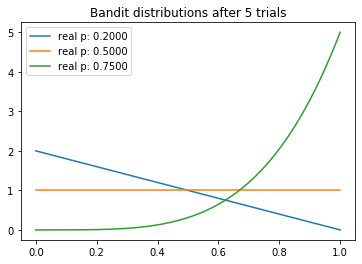

current samples: ['0.1935', '0.0163', '0.7698']


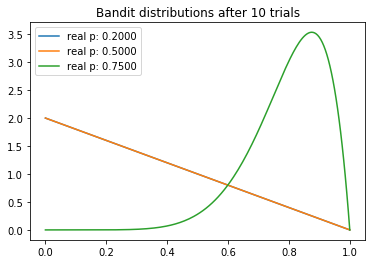

current samples: ['0.0806', '0.5004', '0.9161']


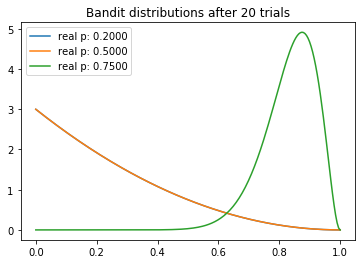

current samples: ['0.2050', '0.1388', '0.8971']


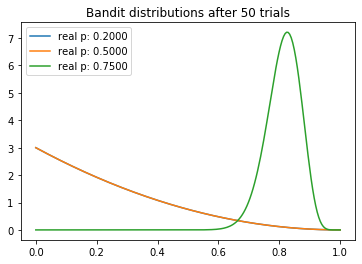

current samples: ['0.0555', '0.0838', '0.8012']


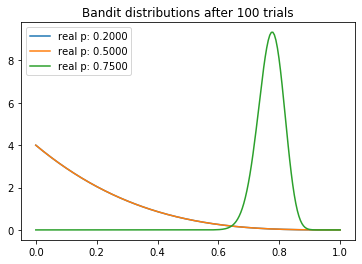

current samples: ['0.4525', '0.0752', '0.7951']


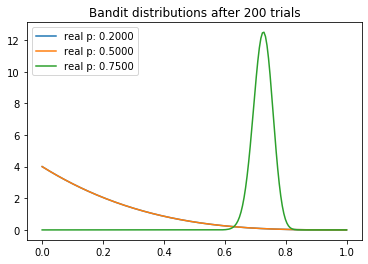

current samples: ['0.0559', '0.0381', '0.7579']


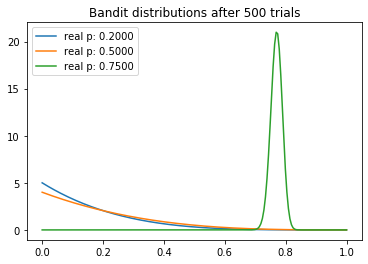

current samples: ['0.1711', '0.3887', '0.7536']


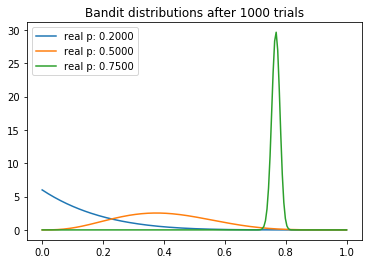

current samples: ['0.1885', '0.3112', '0.7767']


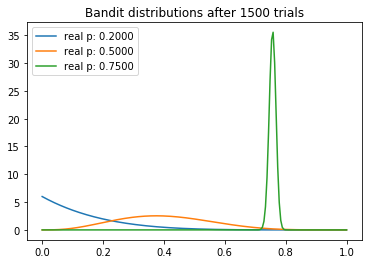

current samples: ['0.1058', '0.1914', '0.7520']


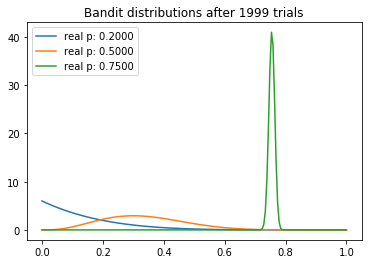

In [31]:
experiment();

## Example 2

In [59]:
'''
This function takes as input three tuples for alpha,beta that specify priorR,priorG,priorB 
And returns R,G,B along with the maximum value sampled from these three distributions.
We can sample from a beta distribution using scipy.
'''
def find_asset(priorR,priorG,priorB):    
    red_rv = beta.rvs(priorR[0],priorR[1])
    green_rv = beta.rvs(priorG[0],priorG[1])
    blue_rv = beta.rvs(priorB[0],priorB[1])
    return assets[np.argmax([red_rv,green_rv,blue_rv])]


'''
This is a helper function that simulates the real world using the actual probability value of the assets.
In real life we won't have this function and our user click input will be the proxy for this function.
'''
def simulate_real_website(asset, real_probs_dict):
    #simulate a coin toss with probability. Asset clicked or not.
    if real_probs_dict[asset]> uniform.rvs(0,1):
        return 1
    else:
        return 0

'''
This function takes as input the selected asset and returns the posteriors for the selected asset.
'''
def update_posterior(asset,priorR,priorG,priorB,outcome):
    if asset=='R':
        priorR=(priorR[0]+outcome,priorR[1]+1-outcome)
    elif asset=='G':
        priorG=(priorG[0]+outcome,priorG[1]+1-outcome)
    elif asset=='B':
        priorB=(priorB[0]+outcome,priorB[1]+1-outcome)
    return priorR,priorG,priorB


'''
This function runs the strategy once.
'''
def run_strategy_once(priorR,priorG,priorB):
    # 1. get the asset
    asset = find_asset(priorR,priorG,priorB)
    # 2. get the outcome from the website/users
    outcome = simulate_real_website(asset, real_probs_dict)
    # 3. update prior based on outcome
    priorR,priorG,priorB = update_posterior(asset,priorR,priorG,priorB,outcome)
    return asset,priorR,priorG,priorB

def plot_posteriors(priorR,priorG,priorB,ax=None,title=None):
    #fig = plt.figure(figsize=(12.5, 10))
    parameters = [priorR,priorG,priorB]
    x = np.linspace(0.001, 1, 150)
    for i, (_alpha, _beta) in enumerate(parameters):
        color = assets[i]
        y = beta.pdf(x, _alpha, _beta)
        lines = sns.lineplot(x, y, label="%s (%.1f,%.1f)" % (color, _alpha, _beta), color = color,ax=ax)
        plt.fill_between(x, 0, y, alpha=0.2, color=color)
        if title:
            plt.title(title)
        plt.autoscale(tight=True)
    plt.legend(title=r"$\alpha, \beta$ - parameters")
    return plt

In [60]:
real_probs_dict = {'R':0.8,'G':0.4,'B':0.3}
assets = ['R','G','B']

priorR,priorG,priorB = (1,1),(1,1),(1,1)

data = [("_",priorR,priorG,priorB)]

for i in range(50):
    asset,priorR,priorG,priorB = run_strategy_once(priorR,priorG,priorB)
    data.append((asset,priorR,priorG,priorB))

/Users/jujohnson/anaconda3/envs/tf.latest/lib/python3.6/site-packages/ipykernel_launcher.py:57: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
/Users/jujohnson/anaconda3/envs/tf.latest/lib/python3.6/site-packages/IPython/core/pylabtools.py:128: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  fig.canvas.print_figure(bytes_io, **kw)


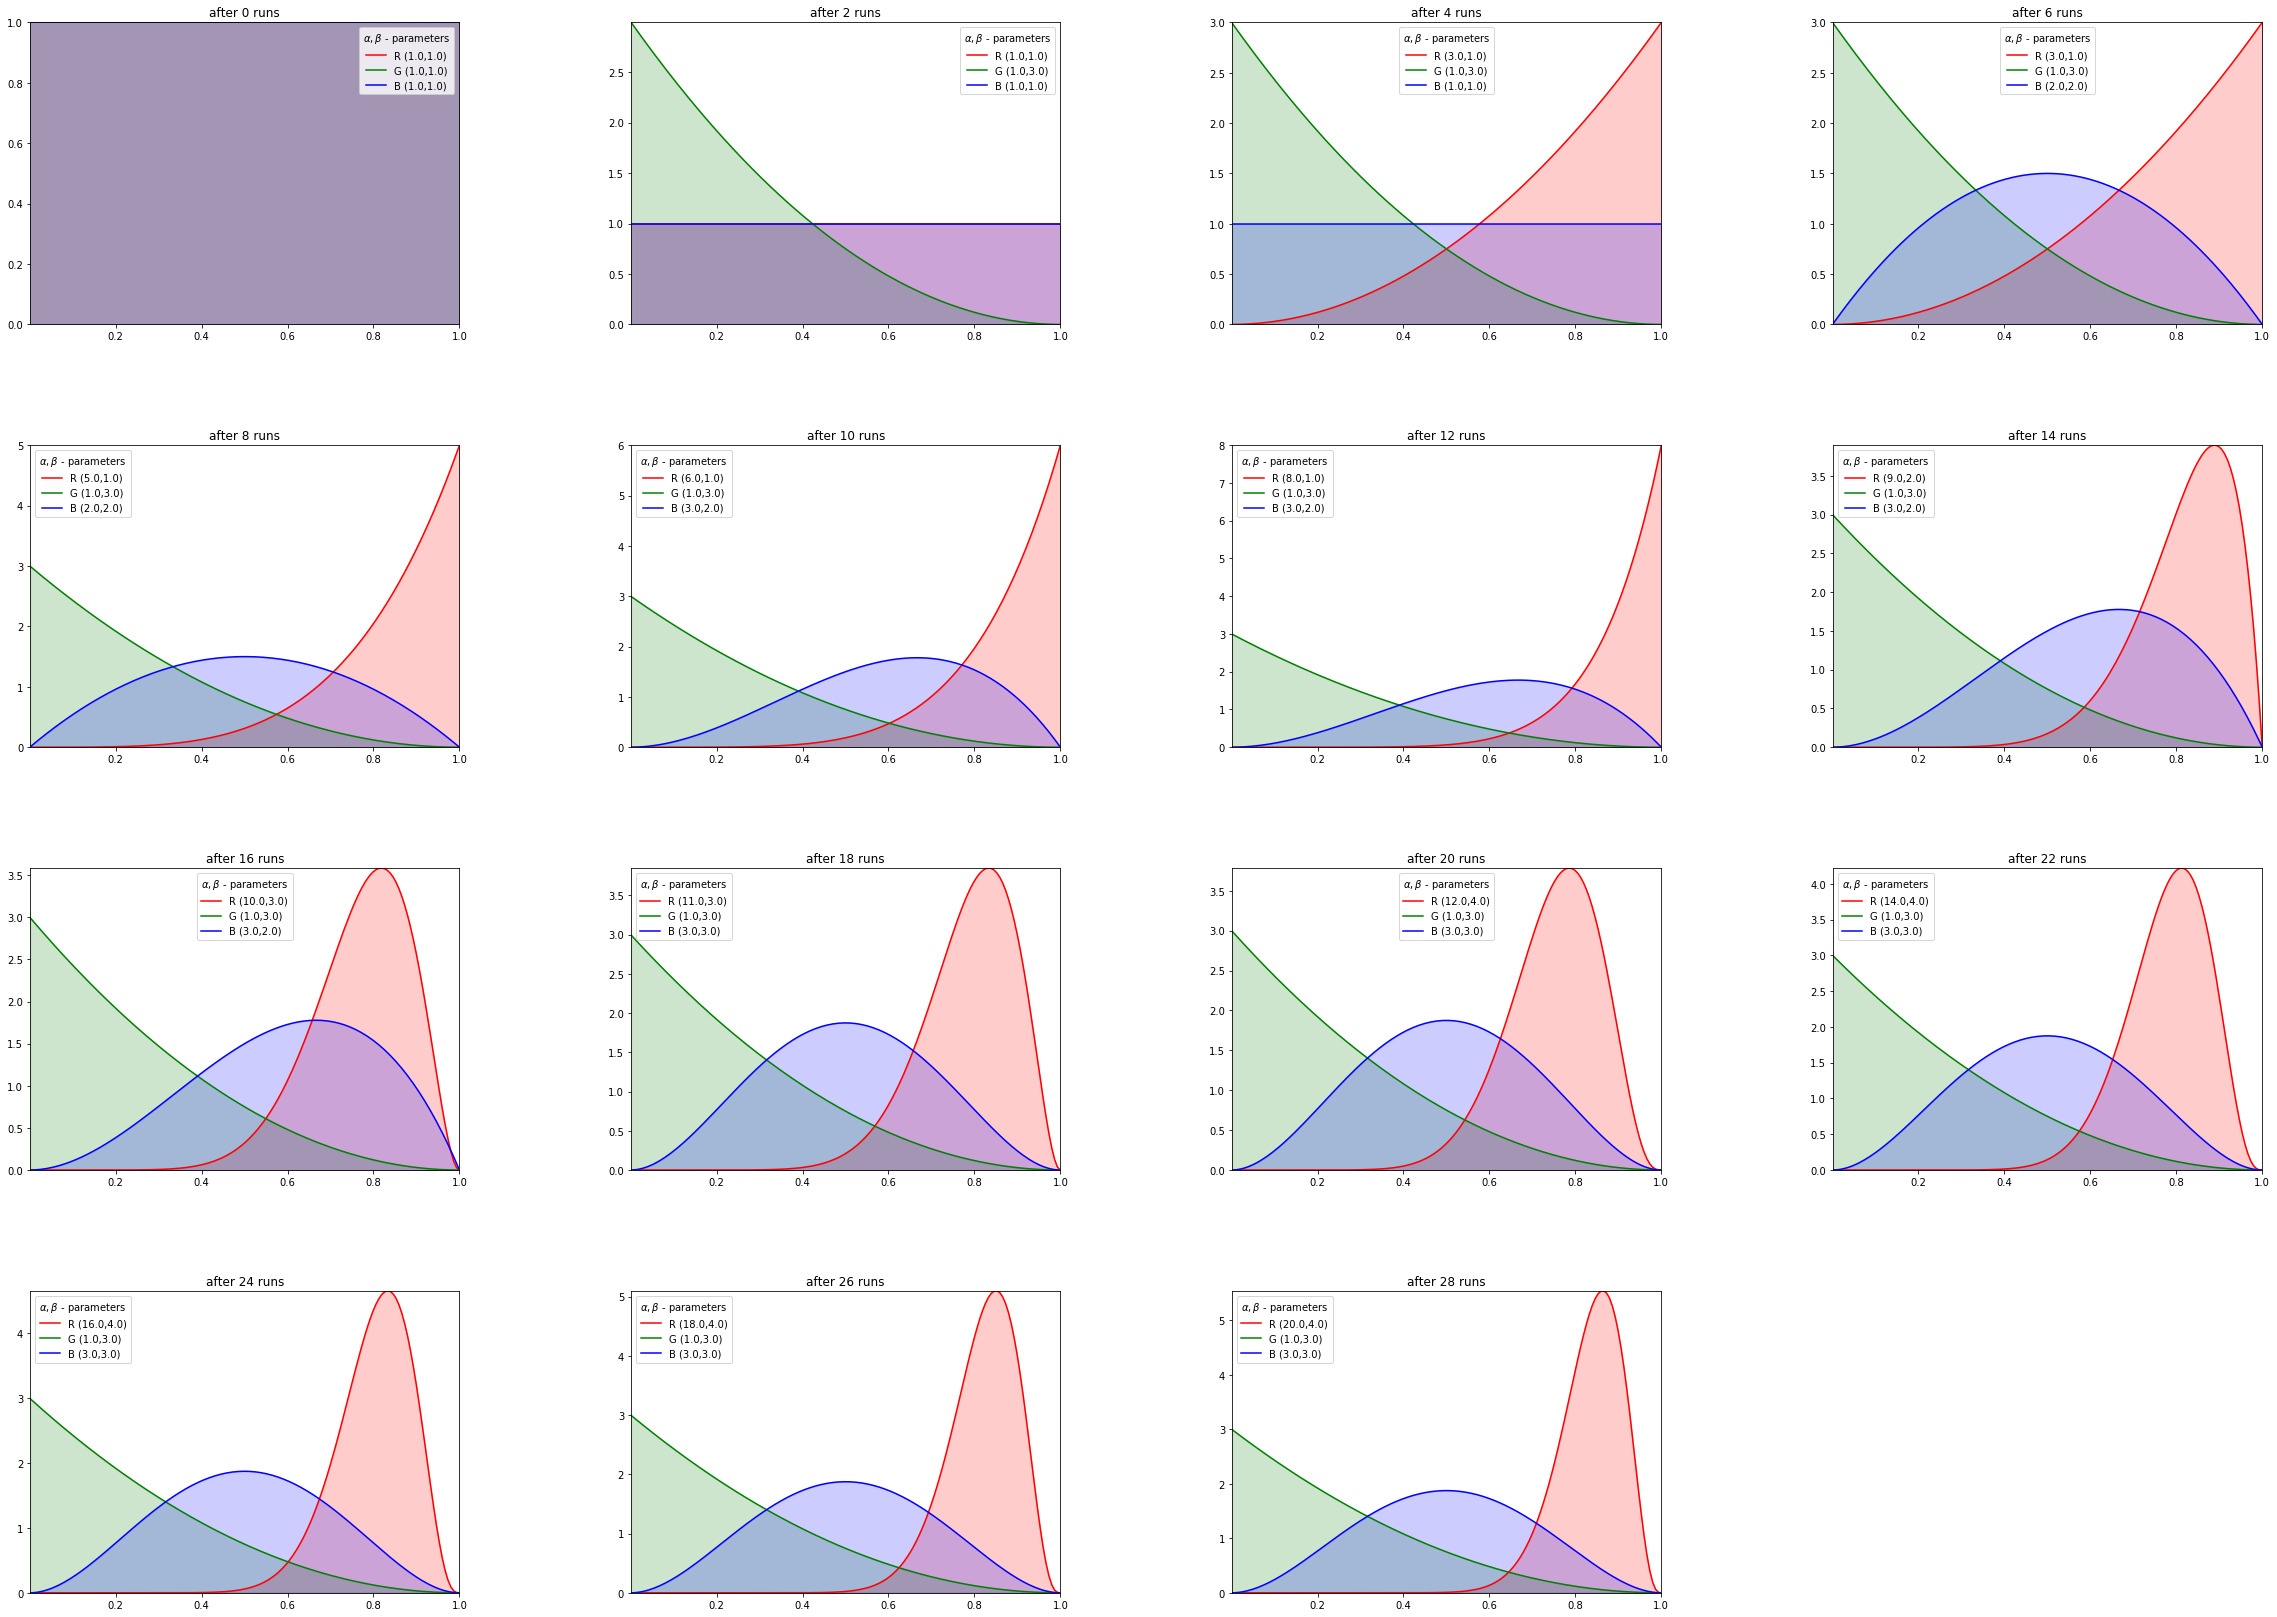

In [61]:
fig = plt.figure(figsize=(40, 60))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
cnt=1
for i in range(0,30,2):
    ax = fig.add_subplot(8, 4, cnt)
    g = plot_posteriors(*data[i][1:],ax,"after "+str(i)+" runs")
    cnt+=1
plt.show()